<a href="https://colab.research.google.com/github/fatmazaarour/Marketing-Campaign-Analytics-Customer-Segmentation/blob/main/Marketing%20Campaign%20Optimization%2C%20Segmentation%20%26%20Response%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [8]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['marketing_analytics_project_data (5).xlsx']))

Saving marketing_analytics_project_data.xlsx to marketing_analytics_project_data (5).xlsx


KeyError: 'marketing_analytics_project_data (4).xlsx'

In [12]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("marketing_analytics_project_data.xlsx")

Saving marketing_analytics_project_data.xlsx to marketing_analytics_project_data (7).xlsx


In [13]:
df.head()

,customer_id,age,income,total_spent,purchase_frequency,last_purchase_days_ago,channel,campaign_response,region
0,1,26,23704,5429.64,42,169,Email,1,Asia
1,2,43,85227,8065.06,48,43,Email,1,Asia
2,3,69,22092,2187.59,19,352,SMS,0,Middle East
3,4,68,25915,12561.59,37,33,Social Media,0,Europe
4,5,69,75695,2417.27,15,294,Email,0,Middle East


In [14]:
df.shape, df.columns

((1000, 9),
 Index(['customer_id', 'age', 'income', 'total_spent', 'purchase_frequency',
        'last_purchase_days_ago', 'channel', 'campaign_response', 'region'],
       dtype='object'))

In [15]:

df.isna().sum()

,0
customer_id,0
age,0
income,0
total_spent,0
purchase_frequency,0
last_purchase_days_ago,0
channel,0
campaign_response,0
region,0


In [16]:
df.describe(include="all")

,customer_id,age,income,total_spent,purchase_frequency,last_purchase_days_ago,channel,campaign_response,region
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,SMS,NaN,Middle East
freq,NaN,NaN,NaN,NaN,NaN,NaN,261,NaN,270
mean,500.500000,44.007000,70056.486000,6366.356090,24.934000,184.756000,NaN,0.299000,NaN
std,288.819436,15.573165,29299.155057,5342.587406,14.566187,103.597553,NaN,0.458049,NaN
min,1.000000,18.000000,20099.000000,46.890000,1.000000,1.000000,NaN,0.000000,NaN
25%,250.750000,30.000000,45093.250000,1927.262500,12.000000,98.750000,NaN,0.000000,NaN
50%,500.500000,44.000000,68348.500000,4847.680000,24.000000,186.000000,NaN,0.000000,NaN
75%,750.250000,58.000000,96076.750000,9595.220000,37.000000,273.000000,NaN,1.000000,NaN


In [17]:
conversion_rate = df["campaign_response"].mean()
conversion_rate

np.float64(0.299)

In [18]:
print(f"Overall conversion rate: {conversion_rate:.2%}")

Overall conversion rate: 29.90%


The overall campaign conversion rate is 29.9%, meaning that nearly 3 out of 10 customers responded positively to the marketing campaign. This indicates a moderately strong campaign performance. However, further segmentation is required to identify which customer groups or channels drive this performance.

In [19]:
channel_perf = (
    df.groupby("channel")["campaign_response"]
      .agg(conversion_rate="mean", responders="sum", total="count")
      .sort_values("conversion_rate", ascending=False)
)

channel_perf

,conversion_rate,responders,total
channel,,,
Social Media,0.316456,75,237
Email,0.308594,79,256
Call,0.288618,71,246
SMS,0.283525,74,261


Social Media is the highest-performing channel in terms of conversion rate, followed closely by Email. This suggests that digital engagement channels are more effective than traditional direct contact methods such as SMS and Call. Marketing investment could therefore be reallocated toward high-performing digital channels to maximize ROI.

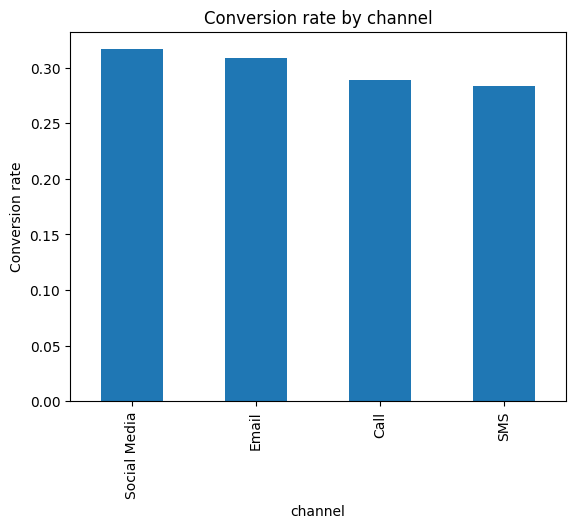

In [20]:
import matplotlib.pyplot as plt

channel_perf["conversion_rate"].plot(kind="bar")
plt.ylabel("Conversion rate")
plt.title("Conversion rate by channel")
plt.show()

In [21]:
region_perf = (
    df.groupby("region")["campaign_response"]
      .agg(conversion_rate="mean", responders="sum", total="count")
      .sort_values("conversion_rate", ascending=False)
)
region_perf

,conversion_rate,responders,total
region,,,
Europe,0.307377,75,244
Asia,0.304721,71,233
Middle East,0.296296,80,270
North America,0.288538,73,253


Conversion rates are relatively balanced across regions, with Europe and Asia slightly outperforming other regions. This indicates that the campaign message has broad geographic effectiveness, but localized optimization strategies may further enhance performance in underperforming regions.

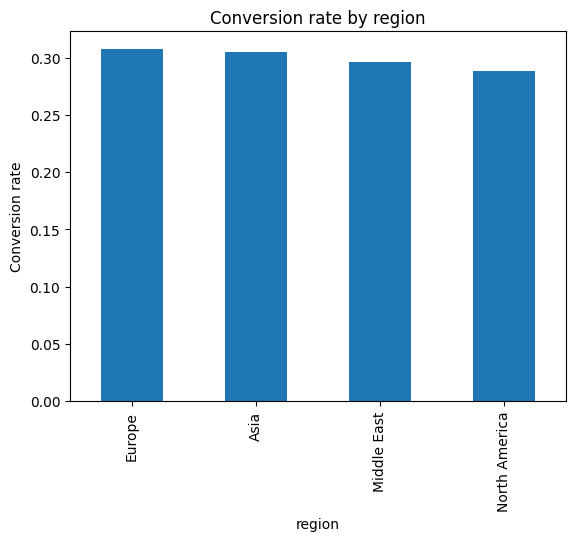

In [22]:
region_perf["conversion_rate"].plot(kind="bar")
plt.ylabel("Conversion rate")
plt.title("Conversion rate by region")
plt.show()

In [23]:
pivot = pd.pivot_table(
    df,
    index="region",
    columns="channel",
    values="campaign_response",
    aggfunc="mean"
).round(3)

pivot

channel,Call,Email,SMS,Social Media
region,,,,
Asia,0.357,0.321,0.233,0.311
Europe,0.361,0.176,0.325,0.345
Middle East,0.264,0.370,0.273,0.258
North America,0.175,0.324,0.290,0.356


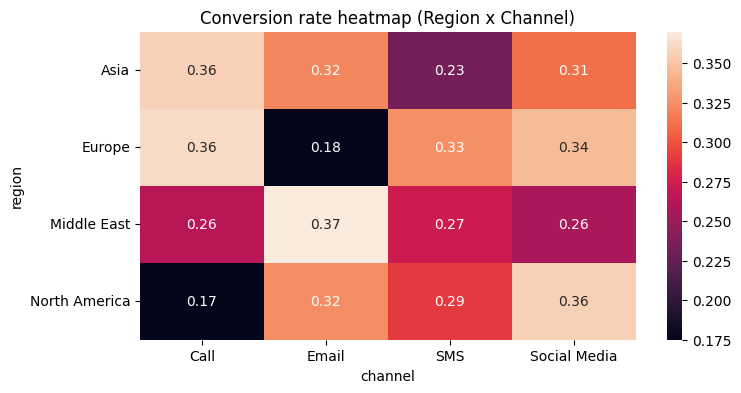

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("Conversion rate heatmap (Region x Channel)")
plt.show()

The heatmap reveals that channel effectiveness varies by region. For example, Email performs strongly in the Middle East, while Social Media is more effective in North America. This suggests that a region-specific channel strategy would likely improve campaign efficiency.

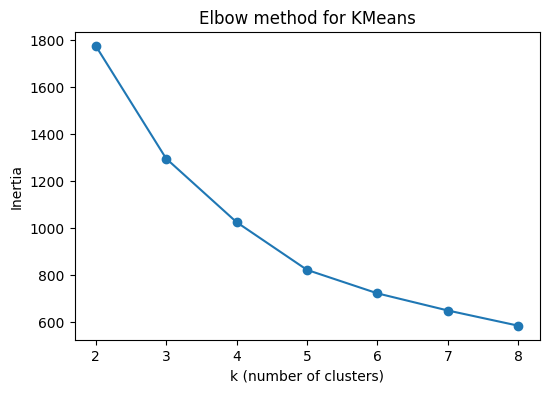

,customer_id,recency,frequency,monetary,segment
0,1,169,42,5429.64,3
1,2,43,48,8065.06,1
2,3,352,19,2187.59,2
3,4,33,37,12561.59,1
4,5,294,15,2417.27,2


In [26]:
import pandas as pd
import numpy as np

# 1) Feature Engineering: RFM-style features
# Recency = inverse of last_purchase_days_ago (lower days -> better)
df_seg = df.copy()

# Safety: ensure numeric
for col in ["total_spent", "purchase_frequency", "last_purchase_days_ago", "age", "income"]:
    df_seg[col] = pd.to_numeric(df_seg[col], errors="coerce")

# RFM features
df_seg["recency"] = df_seg["last_purchase_days_ago"]                # lower is better
df_seg["frequency"] = df_seg["purchase_frequency"]                  # higher is better
df_seg["monetary"] = df_seg["total_spent"]                          # higher is better

# Optional: drop rows with missing essentials
df_seg = df_seg.dropna(subset=["recency", "frequency", "monetary"]).reset_index(drop=True)

# 2) Scale features
from sklearn.preprocessing import StandardScaler

X = df_seg[["recency", "frequency", "monetary"]].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Choose K (Elbow method quick)
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow method for KMeans")
plt.show()

# 4) Fit final model (اختاري k حسب ال elbow, هنا نخليها 4 ك default)
k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df_seg["segment"] = kmeans.fit_predict(X_scaled)

df_seg[["customer_id","recency","frequency","monetary","segment"]].head()

The segmentation analysis highlights distinct customer profiles. High Value Loyal customers demonstrate high spending and purchase frequency, making them critical for revenue stability. In contrast, At Risk customers show low recent engagement and lower monetary value, indicating potential churn risk.

In [27]:
# =========================================
# STEP 7 — Segment profiling + Campaign performance per segment
# =========================================

# Segment summary
seg_profile = (
    df_seg.groupby("segment")
          .agg(
              customers=("customer_id","count"),
              avg_recency=("recency","mean"),
              avg_frequency=("frequency","mean"),
              avg_monetary=("monetary","mean"),
              conversion_rate=("campaign_response","mean")
          )
          .sort_values("conversion_rate", ascending=False)
)

seg_profile

,customers,avg_recency,avg_frequency,avg_monetary,conversion_rate
segment,,,,,
0,308,83.318182,19.146104,3924.541266,0.318182
1,188,136.680851,41.877660,14577.705532,0.308511
2,272,265.474265,11.275735,2255.232316,0.286765
3,232,263.745690,34.900862,7773.989440,0.280172


Interestingly, the Standard segment achieved the highest conversion rate. This suggests that medium-value customers may be more responsive to promotional incentives compared to high-value loyal customers, who may already have strong brand engagement. Targeted promotional strategies could further increase conversion among high-value segments.

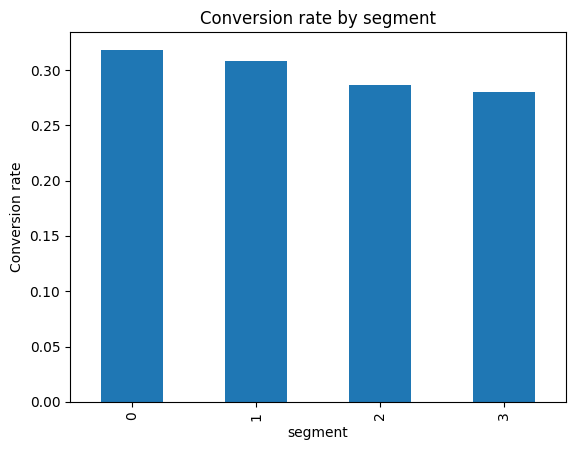

In [28]:
# Plot conversion rate by segment
import matplotlib.pyplot as plt

seg_profile["conversion_rate"].plot(kind="bar")
plt.ylabel("Conversion rate")
plt.title("Conversion rate by segment")
plt.show()

In [29]:
# =========================================
# STEP 8 — Name segments (optional, portfolio-friendly)
# =========================================

# Create simple labels based on monetary & frequency & recency
# (You can tweak the logic later)
def label_segment(row, med_m, med_f, med_r):
    if row["avg_monetary"] >= med_m and row["avg_frequency"] >= med_f and row["avg_recency"] <= med_r:
        return "High Value Loyal"
    if row["avg_monetary"] >= med_m and row["avg_recency"] <= med_r:
        return "High Value Recent"
    if row["avg_frequency"] >= med_f and row["avg_recency"] <= med_r:
        return "Frequent Buyers"
    if row["avg_recency"] > med_r:
        return "At Risk / Inactive"
    return "Standard"

med_m = seg_profile["avg_monetary"].median()
med_f = seg_profile["avg_frequency"].median()
med_r = seg_profile["avg_recency"].median()

seg_profile_named = seg_profile.copy()
seg_profile_named["segment_name"] = seg_profile_named.apply(lambda r: label_segment(r, med_m, med_f, med_r), axis=1)

seg_profile_named

,customers,avg_recency,avg_frequency,avg_monetary,conversion_rate,segment_name
segment,,,,,,
0,308,83.318182,19.146104,3924.541266,0.318182,Standard
1,188,136.680851,41.877660,14577.705532,0.308511,High Value Loyal
2,272,265.474265,11.275735,2255.232316,0.286765,At Risk / Inactive
3,232,263.745690,34.900862,7773.989440,0.280172,At Risk / Inactive


In [30]:
# Map names back to df_seg
name_map = seg_profile_named["segment_name"].to_dict()
df_seg["segment_name"] = df_seg["segment"].map(name_map)

# Check performance by segment_name
seg_name_perf = (
    df_seg.groupby("segment_name")["campaign_response"]
          .agg(conversion_rate="mean", responders="sum", total="count")
          .sort_values("conversion_rate", ascending=False)
)
seg_name_perf

,conversion_rate,responders,total
segment_name,,,
Standard,0.318182,98,308
High Value Loyal,0.308511,58,188
At Risk / Inactive,0.283730,143,504


In [31]:
import matplotlib.pyplot as plt

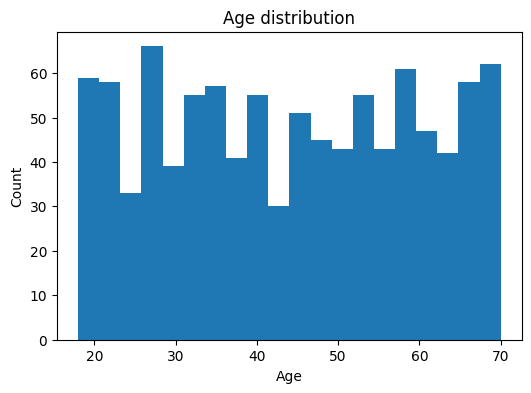

In [33]:
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

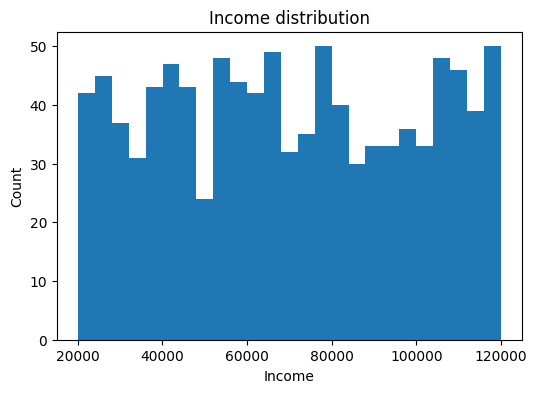

In [34]:
plt.figure(figsize=(6,4))
plt.hist(df["income"], bins=25)
plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show

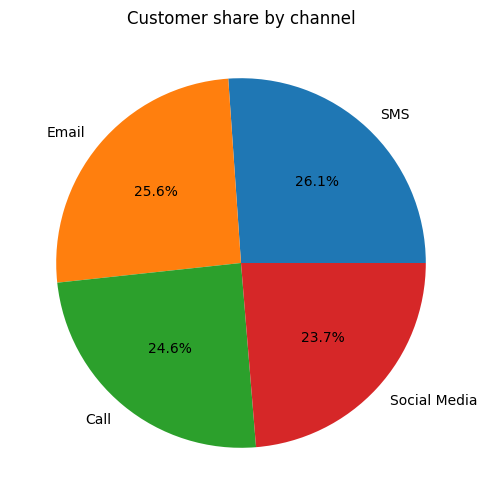

In [35]:
channel_counts = df["channel"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(channel_counts.values, labels=channel_counts.index, autopct="%1.1f%%")
plt.title("Customer share by channel")
plt.show()

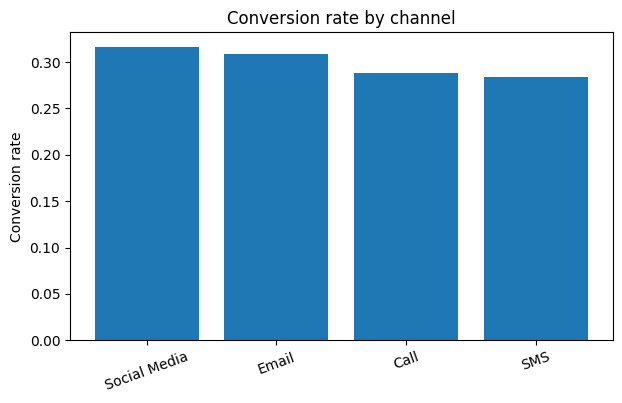

In [36]:
plt.figure(figsize=(7,4))
plt.bar(channel_perf.index, channel_perf["conversion_rate"])
plt.title("Conversion rate by channel")
plt.ylabel("Conversion rate")
plt.xticks(rotation=20)
plt.show()

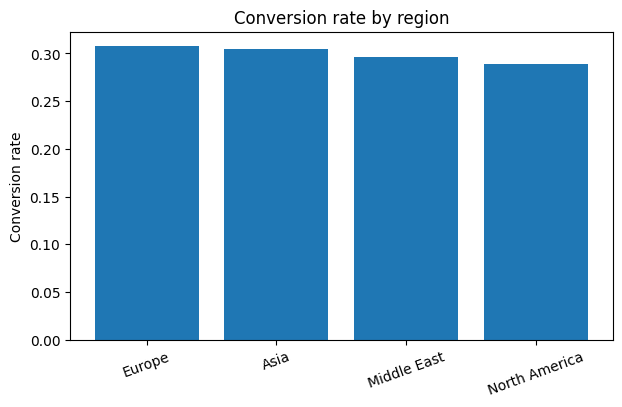

In [37]:
region_perf = (
    df.groupby("region")["campaign_response"]
      .agg(conversion_rate="mean", responders="sum", total="count")
      .sort_values("conversion_rate", ascending=False)
)

plt.figure(figsize=(7,4))
plt.bar(region_perf.index, region_perf["conversion_rate"])
plt.title("Conversion rate by region")
plt.ylabel("Conversion rate")
plt.xticks(rotation=20)
plt.show()

/tmp/ipython-input-1540394483.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=channels)


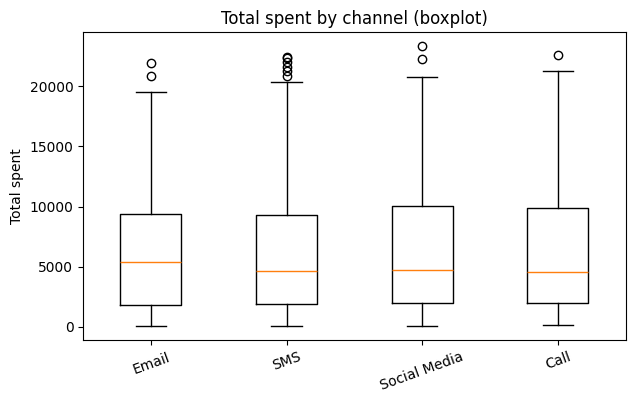

In [38]:
channels = df["channel"].unique()
data = [df.loc[df["channel"]==c, "total_spent"].dropna() for c in channels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=channels)
plt.title("Total spent by channel (boxplot)")
plt.ylabel("Total spent")
plt.xticks(rotation=20)
plt.show()

The distribution of total spending across channels appears relatively similar, suggesting that conversion rate differences are not solely driven by spending behavior. This implies that channel effectiveness is more related to engagement strategy rather than customer purchasing power.

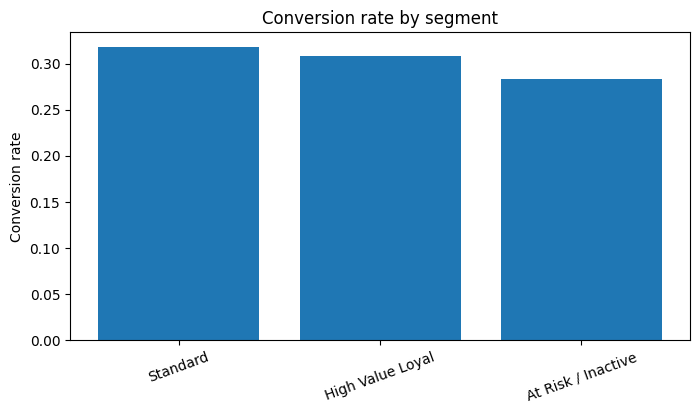

In [39]:
seg_name_perf = (
    df_seg.groupby("segment_name")["campaign_response"]
          .agg(conversion_rate="mean", responders="sum", total="count")
          .sort_values("conversion_rate", ascending=False)
)

plt.figure(figsize=(8,4))
plt.bar(seg_name_perf.index, seg_name_perf["conversion_rate"])
plt.title("Conversion rate by segment")
plt.ylabel("Conversion rate")
plt.xticks(rotation=20)
plt.show()



overall, the analysis demonstrates that campaign performance is influenced by both customer segmentation and channel selection. Digital channels, particularly Social Media and Email, show stronger performance. Additionally, mid-tier customers appear highly responsive to marketing efforts. These insights support a data-driven optimization strategy focusing on channel efficiency and segment-specific targeting.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Features
features = [
    "age",
    "income",
    "total_spent",
    "purchase_frequency",
    "last_purchase_days_ago"
]

X = df[features]
y = df["campaign_response"]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.723

Confusion Matrix:
[[217   0]
 [ 83   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       217
           1       0.00      0.00      0.00        83

    accuracy                           0.72       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.52      0.72      0.61       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model achieved an overall accuracy of 72%, which initially suggests acceptable performance. However, accuracy alone is misleading due to class imbalance in the dataset

The model failed to predict any positive conversions. It classified all customers as non-responders. This indicates severe bias toward the majority class and poor sensitivity toward identifying actual responders.

The model completely fails to detect converting customers (recall = 0). This makes the model ineffective for marketing targeting, as it cannot identify customers likely to respond

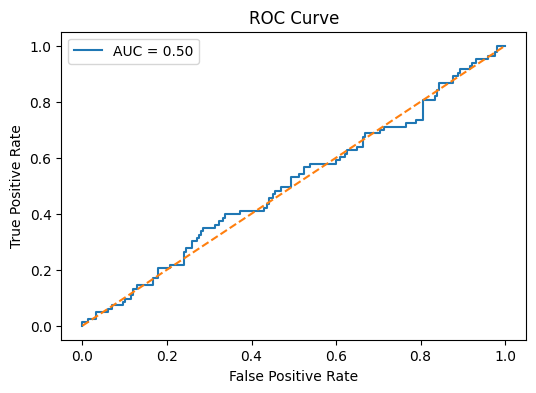

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

the AUC score of 0.50 indicates that the model performs no better than random guessing. This confirms that the current feature set does not provide strong predictive power for campaign response.

In [47]:
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values("Coefficient", ascending=False)

coefficients

,Feature,Coefficient
3,purchase_frequency,0.108444
4,last_purchase_days_ago,-0.025424
1,income,-0.037028
2,total_spent,-0.130686
0,age,-0.230636


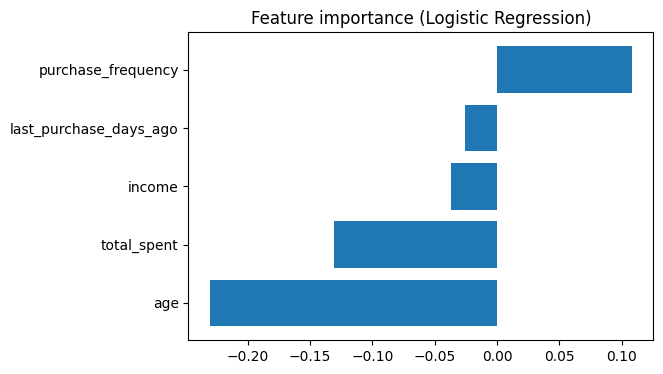

In [48]:
plt.figure(figsize=(6,4))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.title("Feature importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

From coefficients:

purchase_frequency → positive

last_purchase_days_ago → slightly negative

income → slightly negative

total_spent → negative

age → negative

Interpretation

Purchase frequency appears to be the strongest positive predictor of campaign response. Customers who buy more frequently are slightly more likely to convert. However, the overall weak model performance suggests that the available behavioral features alone are insufficient to accurately predict campaign response.

he limited predictive power suggests that campaign response in this dataset may not be strongly driven by demographic or purchase behavior alone. Additional variables such as engagement metrics, historical campaign interaction, or behavioral signals may be required to improve predictive accuracy.

